## pydANN ( python deep Artificial Neural Network )

is a free and open source python library to implement the Machine Learning algorithm of neural networks
The network can be as simple as a sinle layer perceptron net or a multi-layer deep neural net.
THe design and modifications of this library is posted [here](https://www.github.com/ShimronAlakkal)


### 1 - Packages

These are some of the most important packages that you're going to need in order to use ***```pydANN```***

- [numpy](www.numpy.org) (or numeric python) is the main package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs -- which are optional -- in Python.
- [pickle](https://docs.python.org/3/library/pickle.html) is the library pydANN uses to save your trained models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle 

### Custom tools (functions) that are called inside of the activation layer.
To specify the activation function for a layer use `activation_specific = f` with `addHL()`,  where `f` is a list, of length of hidden layers + 1, and each index with a custom function name.
If there is a mismatch in the input activation_specifics, the model is going to auto adjust the activation with the last ones from your input.

In [41]:
def relu(Z):
    return np.maximum(0,Z)

def sigmoid(Z):
    return 1 / (1 + np.exp(-1 * Z))

def leaky_relu(Z):
    return np.maximum(0.1*Z)

def sigmoid_d(Z):
    return sigmoid(Z) * ( 1 - sigmoid(Z) ) 

def relu_d(Z):
    Z[Z >= 0] = 1
    Z[Z < 0]  = 0
    return Z

In [102]:
class ann:
    
    def __init__(self):
        self.hidden_Layers = [3,2]
        self.total_layers = []
        self.learning_rate = 0
        self.epoch = 0
        self.W = {}
        self.b = {}
        self.Z = {}
        self.A = {}
        self.activation_functions = []
        self.costs = [0]
        self.dW = {}
        self.db = {}
        self.dZ = {}
        self.dA = {}
        self.lr_change = []
        
    
    
    def add_hl(self,hl,activations ):
        self.hidden_Layers.clear()
        self.hidden_Layers = hl
        
        # settingf the activations
        if len(activations) == len(hl)+1:
            self.activation_functions = activations
        else:
            print('Passed activations should be 1 more than the HL length \n recall the function to override HL')
                
        
    def dispose_model(self):
        self.total_layers.clear()
        self.hidden_Layers.clear()
        self.costs.clear()
        self.lr_change.clear()
        self.Z.clear()
        self.W.clear()
        self.b.clear()
        self.db.clear()
        self.dW.clear()
        self.dZ.clear()
        self.dA.clear()
            
    def register_training_data(self,train_x,train_y):
        self.total_layers.clear()
        self.total_layers.append(train_x.shape[0])
        for i in self.hidden_Layers:
            self.total_layers.append(i)
       
        # network structure
        self.total_layers.append(train_y.shape[0])
        print(f"Network structure update :{self.total_layers}\n feature(s) : {self.total_layers[0]} \n label(s) : {self.total_layers[-1]} \n hidden layers : {self.hidden_Layers}")
        
        
        
    def init_Params(self,verbose = False):
        
        # creating the weights and biases with seed(1)
        np.random.seed(144)
        for i in range(1,len(self.total_layers)):
            
            self.W['W'+str(i)] = np.random.randn(self.total_layers[i],self.total_layers[i-1]) * 0.01
            self.b['b'+str(i)] = np.random.randn(self.total_layers[i],1)
        
        if verbose:
            print('shape of weight(s) initialized : \n ')
            for i in self.W.values():
                print(i.shape)
            print('shape of bias(es) initialized : \n ')
            for i in self.b.values():
                print(i.shape)

    
    
    def forePropagate(self,train_x):
        self.A['A0'] = train_x
        a = self.activation_functions
        
        # populating Z and A with data
        for i in range(1,len(self.total_layers)):
            
            # the formula for fore-propagation is z = W.X + b
            self.Z[ 'Z'+str(i) ] = np.dot( self.W['W'+str(i)] , self.A['A'+str(i-1)] ) + self.b['b'+str(i)]
          
            # populating the activation dictionary with index values
            
            if a[i-1] == 'relu':
                self.A['A'+str(i)] = relu( self.Z['Z'+str(i)] )
            elif a[i-1] == 'sigmoid': 
                self.A['A'+str(i)] = sigmoid( self.Z['Z'+str(i)] )
            else:
                self.A['A'+str(i)] = leaky_relu( self.Z['Z'+str(i)] )
                
    
    def cost_calc(self,Y,loss_function ):
        
        # the `m` used in cost functions represent the total number of training examples
        if loss_function in ['mse','MSE']:
            
            # use mean squared error function     
            loss = ( 1 /  Y.shape[1]) * ( np.sum(np.square (  Y - self.A[ 'A'+str(len(self.total_layers)-1)])))
            cost = np.squeeze(loss)
         
            self.costs.append(cost)
            
            
        else : #['rmse','RMSE']:
            
            # use the root mean squared function
            loss = np.sqrt( ( 1 / Y.shape[1]) * ( np.sum(np.square (  Y - self.A[ 'A'+str(len(self.total_layers)-1)])))) 
            cost = np.squeeze(loss)
            
            self.costs.append(cost)
        
#         elif loss_function in ['mae','MAE']:
            
#             use the mean absolute error function here 
#             self.costs.append( 1 / Y.shape[1] * (np.sum(  )) )  # you're going to have to do modulus here
            
#         else:
            
#             # use binary cross entropy
#             self.costs.append( np.squeeze(-1 * np.sum( np.multiply( Y ,np.log(self.A[ 'A'+str(len(self.total_layers)-1)]) ) +
#                                                         np.multiply( (1-Y),np.log(1-self.A[ 'A'+str(len(self.total_layers)-1)]) ) ) / Y.shape[1] ) )
            
            
            
    def back_prop(self,Y):
        
        # compute dA final layer 
        self.dA['dA'+str(len(self.total_layers)-1)] =  (-1 * np.divide(Y,self.A['A'+str(len(self.total_layers)-1)])) - np.divide(1-Y, 1-self.A['A'+str(len(self.total_layers)-1)])
        
        
        # check for the final layer activation_func
        if self.activation_functions[-1] == 'sigmoid':
            self.dZ['dZ'+str(len(self.total_layers)-1)] = np.multiply( self.dA['dA'+str(len(self.total_layers)-1)] , sigmoid_d(self.Z['Z'+str(len(self.total_layers)-1)]) )
        elif self.activation_functions[-1] == 'relu':
            self.dZ['dZ'+str(len(self.total_layers)-1)] = np.multiply( self.dA['dA'+str(len(self.total_layers)-1)] , relu_d(self.Z['Z'+str(len(self.total_layers)-1)]) )
#         else:
#             self.dZ['dZ'+str(len(self.total_layers)-1)] = np.multiply( self.dA['dA'+str(len(self.total_layers)-1)] , leaky_relu(self.Z['Z'+str(len(self.total_layers)-1)]) )
        
        # get dW final layer
        self.dW['dW'+str(len(self.total_layers)-1)] = ( 1 / Y.shape[1] ) * np.dot( self.dZ['dZ'+str(len(self.total_layers)-1)] , self.A['A'+str(len(self.total_layers)-2)].T )
        
        # get db final layer 
        self.db['db'+str(len(self.total_layers)-1)] = (1/Y.shape[1]) * np.sum(self.dZ['dZ'+str(len(self.total_layers)-1)],axis = 1, keepdims = True)
        
        self.dA['dA'+str(len(self.total_layers)-2)] = np.dot(self.W['W'+str(len(self.total_layers)-1)].T , self.dZ['dZ'+str(len(self.total_layers)-1)] )
        
        
        # loop over the number of hidden layers + 1 in the network in reverse and find weights and biases for them
        for i in reversed(range(1,len(self.total_layers)-1)):
            
            # check for DZ and get it done
            if self.activation_functions[i] == 'sigmoid':
                self.dZ['dZ'+str(i)] = np.multiply( self.dA['dA'+str(i)] , sigmoid_d(self.Z['Z'+str(i)]) )
            elif self.activation_functions[i] == 'relu':
                self.dZ['dZ'+str(i)] = np.multiply( self.dA['dA'+str(i)] , relu_d(self.Z['Z'+str(i)]) )
#             else:
#                 self.dZ['dZ'+str(i)] = np.multiply( self.dA['dA'+str(i)] , leaky_relu_d(self.Z['Z'+str(i)]) )
      
            
            self.dW['dW'+str(i)] = np.dot(self.dZ['dZ'+str(i)], self.A['A'+str(i - 1)].T) / Y.shape[1]
            self.db['db'+str(i)] = np.sum(self.dZ['dZ'+str(i)], axis = 1, keepdims = True) / Y.shape[1]
            self.dA['dA'+str(i - 1)] = np.dot(self.W['W'+str(i)].T, self.dZ['dZ'+str(i)])
        
        
    
    def param_update(self):
        for i in range(1,len(self.total_layers)):
            self.W['W'+str(i)] -= self.learning_rate * self.dW['dW'+str(i)]
            self.b['b'+str(i)] -= self.learning_rate * self.db['db'+str(i)]
            
            
            
    def fit(self,xtrain,ytrain,epoch = 50, learning_rate = 0.01, verbose = 0,decay = True, decay_iter = 5, decay_rate = 0.9, stop_decay_counter = 100, loss_function = 'mse'):
#         tx = xtrain.T
#         ty = ytrain.T
        self.learning_rate = learning_rate
        self.costs.clear()
        self.lr_change.clear()
        self.init_Params()
        
        for i in range(epoch):
            
            self.forePropagate(tx)
            
            self.cost_calc(ty,loss_function = loss_function)
            
            self.back_prop(ty)
            
            self.param_update()
            
            self.lr_change.append(self.learning_rate)
            
            if decay and stop_decay_counter > 0 and i % decay_iter == 0:
                self.learning_rate = decay_rate * self.learning_rate
                stop_decay_counter -= 1
                self.lr_change.append(self.learning_rate)
                
            if verbose and i % verbose == 0 and str( self.costs[-1] ) != 'nan':
                
                print(f'epoch {i} : \t cost = {self.costs[-1]}')
                print(f'learning rate / alpha \t{self.learning_rate}\n')
                
                
            
                
        
    
    def predict(self,xtest):
        
        # we fore prop at first and return the last A
        self.forePropagate(xtest)
        
        return self.A['A'+str(len(self.total_layers)-1)]
    
    
    
    def mse_model_eval(self,ytest,ypreds):
        
        # compute the Mean Squared Error with y-preds and y-test
        try:
            loss = ( 1 / ypreds.shape[1]) * ( np.sum(np.square (  ypreds - self.A[ 'A'+str(len(self.total_layers)-1)])))
            return loss
        except:
            print('Please check the indices and re-try')
            
            
    
    def plot_cost_to_epoch(self):
        self.costs = [self.costs[x] for x in range(1,len(self.costs)) if str(self.costs[x]) != 'nan' ]
        plt.plot(self.costs, color = 'r')
        plt.show()
        
    def plot_lrc_to_epoch(self):
        plt.plot(self.lr_change)
        plt.show;
    
    
    
    def save_model(self,file = 'ann'):
        
        model = {'w':self.W,'b':self.b,'lr':self.learning_rate,'actvns':self.activation_functions,
                        'hl':self.hidden_Layers,'tl':self.total_layers
                        }
        with open(file,'wb') as file :
            file.write(pickle.dump(model,str(file)+'.dat'))
        
        
    
    def use_model(self,path):
        try:
            with open(path,'rb') as file:
                model = pickle.load(file)
                self.W = model['w']
                self.b = model['b']
                self.activation_functions = model['actvns']
                self.total_layers = model['tl']
                self.hidden_Layers = model['hl']
                self.learning_rate = model['lr']
        except:
            print(f"unable to open {path}\n check if you've added the file extension(.dat) with the file path")
    
    
    def auto_model_setup(self,seed):
        pass


In [103]:
model = ann()

In [104]:
model.add_hl([3,2],activations = ['relu','relu','sigmoid'])

In [105]:
np.random.seed(13234)
tx = np.random.random((3,100))
ty = np.random.random((1,100))

In [106]:
model.register_training_data(np.random.random((3,100)),np.random.random((1,100)))

Network structure update :[3, 3, 2, 1]
 feature(s) : 3 
 label(s) : 1 
 hidden layers : [3, 2]


In [107]:
model.init_Params()

In [108]:
model.forePropagate(tx)

print(model.W)
print()
print(model.b)

{'W1': array([[-0.01298571, -0.00092539,  0.00070074],
       [ 0.01855052,  0.0137026 , -0.0018258 ],
       [-0.01170023,  0.01027954, -0.00834468]]), 'W2': array([[-0.01505343,  0.00870126,  0.01223903],
       [-0.02231902,  0.00028256,  0.00310356]]), 'W3': array([[0.00538658, 0.01067838]])}

{'b1': array([[ 0.18779336],
       [-0.64842091],
       [ 0.82941762]]), 'b2': array([[0.55446558],
       [0.29317822]]), 'b3': array([[-1.73308753]])}


In [109]:
model.cost_calc(ty,loss_function = 'rmse')

In [110]:
model.back_prop(ty)

In [111]:
print(model.dW)

{'dW3': array([[-0.26777291, -0.13902404]]), 'dW2': array([[-0.00010768,  0.        , -0.00048894],
       [-0.00022591,  0.        , -0.00102583]]), 'dW1': array([[ 1.81759701e-05,  1.57863732e-05,  2.00463061e-05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.50758051e-06, -4.78347601e-06, -6.07432017e-06]])}


In [112]:
model.param_update()

In [113]:
model.fit(tx,ty,verbose=100,decay=True,learning_rate = 0.01,epoch=500)

epoch 0 : 	 cost = 0.1933068074938493
learning rate / alpha 	0.009000000000000001

epoch 100 : 	 cost = 0.17067479834491064
learning rate / alpha 	0.0010941898913151245

epoch 200 : 	 cost = 0.1678345051103932
learning rate / alpha 	0.00013302794647291155

epoch 300 : 	 cost = 0.16748827923171292
learning rate / alpha 	1.6173092699229914e-05

epoch 400 : 	 cost = 0.1674461736261685
learning rate / alpha 	1.9662705047555346e-06



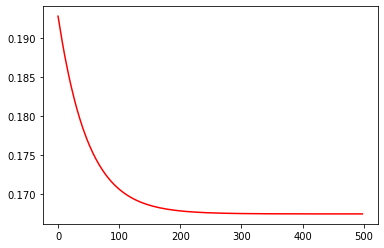

None


In [114]:
print(model.plot_cost_to_epoch())

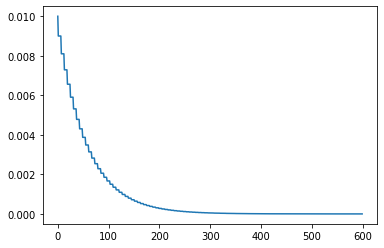

In [120]:
model.plot_lrc_to_epoch()

In [116]:
np.random.seed(324)
testx = np.random.random((3,100))
testy = np.random.random((1,100))

In [117]:
yp = model.predict(testx)

In [118]:
print(yp)

[[0.19504322 0.19504407 0.19504136 0.19504275 0.19504107 0.19504509
  0.19504083 0.19504366 0.19504493 0.19504665 0.19504201 0.19504295
  0.19504419 0.19504469 0.19504514 0.195044   0.1950424  0.19504215
  0.19504162 0.19504119 0.19504508 0.19504121 0.19504481 0.19504428
  0.19504446 0.19504422 0.19504145 0.19504325 0.19504214 0.19504195
  0.19503967 0.19504439 0.19504433 0.19504265 0.19504329 0.19504335
  0.1950416  0.19504566 0.195043   0.19504155 0.19504394 0.19504339
  0.19504391 0.19504362 0.1950469  0.19504337 0.19504238 0.19504297
  0.19504291 0.19504391 0.19504292 0.19504577 0.19504598 0.19504721
  0.19504574 0.19504407 0.19504285 0.19504878 0.19504551 0.19504194
  0.19504341 0.19504548 0.19504271 0.19504063 0.19503953 0.19504286
  0.19504123 0.19504025 0.19504441 0.19504309 0.19504537 0.19504298
  0.19503966 0.19503961 0.19504377 0.19504161 0.19504499 0.19504538
  0.19504566 0.19504364 0.19504218 0.19504559 0.19504144 0.19504121
  0.19504466 0.19504489 0.1950403  0.1950416  0.

In [119]:
model.mse_model_eval(testy,yp)

0.0